In [1]:
import torch
import torch.nn.functional as F
import seaborn as sns
import gym
import model
import numpy as np
import acrobot
import utils_continuous as utils
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
import tqdm

In [3]:
# load the environment
env= acrobot.AcrobotEnv(noise=True)
state = env.reset()
state = torch.from_numpy(state).float()

# load model for policy and value function

# based on https://raw.githubusercontent.com/pytorch/examples/master/reinforcement_learning/actor_critic.py
# A2C separate policy and value
policy = model.Policy()
value = model.Value()

policy.load_state_dict(torch.load("./A2C_policy_Acrobot_noisy.pth"))
value.load_state_dict(torch.load("./A2C_value_Acrobot_noisy.pth"))

# based on 
# https://github.com/khordoo/Deep-Reinforcement-Learning-with-PyTorch/blob/example/examples/DQN/acrobat_v1_rainbow.ipynb
# DQN model
NETWORK_HIDDEN_SIZE = 128
DEVICE = 'cpu'

net = model.DuelingDQN(env.observation_space.shape[0], NETWORK_HIDDEN_SIZE, env.action_space.n).to(DEVICE)
net.load_state_dict(torch.load("./DuelDQN_Acrobot.pth"))

#V_pi = torch.FloatTensor(np.loadtxt("V_pi_until_50_net.txt"))
#V_up = torch.FloatTensor(np.loadtxt("V_up_until_50_net.txt"))
#samples = np.loadtxt("samples_until_50_net.txt")

<All keys matched successfully>

In [ ]:
t = 50                 # moment of time until we get samples
n_samples = 30         # number of trajectories
samples = utils.get_traj(n_samples, net, t)

# compute value function via Monte-Carlo
V_pi = torch.tensor([utils.MonteCarloEval(env, sample, net, 8, 0.9) for sample in tqdm.notebook.tqdm(samples)])

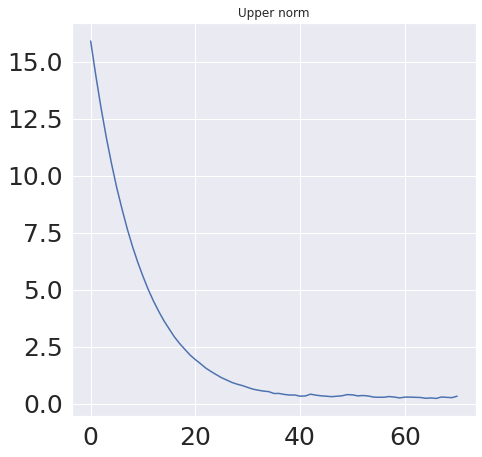

 24%|██▍       | 72/301 [1:50:17<5:50:46, 91.90s/it]


KeyboardInterrupt: ignored

In [ ]:
gamma = 0.9         # discounting factor
k = 2               # number of neighbors
M1 = 150
M2 = 150

V_up = utils.getBounds(env, net, samples, V_pi, gamma, M1, M2, k, 
              total_steps=300, eval_freq = 1, save_freq=10)

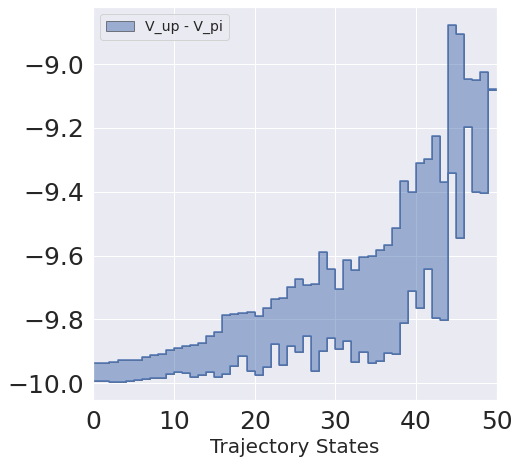

In [ ]:
utils.plotBoundsRandomTraj(env, net, t, samples, V_up)

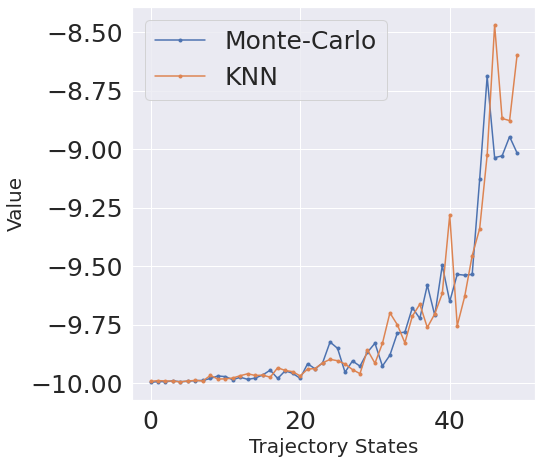

In [ ]:
utils.compare_approx(env, net, t, samples, V_pi)